In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from _utils import u_constant
from tensorflow.contrib import learn
#from tensorflow.contrib.learn.python.learn.estimators.estimator import SKCompat
logging.basicConfig(level=logging.INFO)
path = u_constant.PATH_ROOT + "for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/7/Code/"

In [10]:
TIMESTEPS = 5
HIDDEN_SIZE = 30
NUM_LAYERS = 2
TRAINING_STEPS = 10000
BATCH_SIZE = 100
PRINT_STEPS = 1000

140256
        Load
0  74.562212
1  69.953917
2  71.490015
3  73.026114
4  73.026114
5  69.953917
6  74.562212
7  69.953917
8  66.866359
9  73.026114


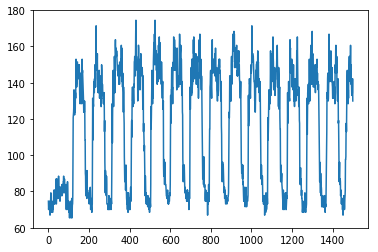

In [4]:
df = pd.read_csv(path + "data/elec_load.csv")
print(len(df))
print(df[:10])
plt.plot(df["Load"][:1500])
plt.show()

In [5]:
sc = StandardScaler()
seq_data = sc.fit_transform(df["Load"].values.reshape(-1, 1))

In [6]:
def generate_data(seq_data, window_width):
    """对序列数据进行分割，形成X，y
    :param seq_data: 原始序列数据, array
    :param window_width: 输入的窗口宽度
    :return: X, y  X with shape [None, 1, window_width], y with shape [None, 1, 1]
    """
    X = []
    y = []
    length = len(seq_data)
    for i in range(length):
        try:
            y.append([seq_data[i + window_width + 1]])  # 若出错，则此步首先出错
            X.append([seq_data[i: i + window_width]])   
        except IndexError:
            break
    X = np.array(X, dtype=np.float64).reshape(-1, window_width, 1)
    y = np.array(y, dtype=np.float64).reshape(-1, 1, 1)
    return X, y
    

In [7]:
def _lstm_cell():
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=HIDDEN_SIZE)
    return cell
def lstm_model(X, y):
    cell = tf.contrib.rnn.MultiRNNCell(cells=[_lstm_cell() for _ in range(NUM_LAYERS)])
    
    # rnn_out shape: [batch_size, window_width, hidden_size]
    rnn_out, _ = tf.nn.dynamic_rnn(cell=cell, inputs=X, dtype=tf.float64, time_major=False)
    # [window_width, batch_size, hidden_size]
    rnn_out = tf.transpose(rnn_out, [1, 0, 2])
    # 通过无激活函数的全联接层计算线性回归
    predictions = tf.contrib.layers.fully_connected(inputs=rnn_out[0], num_outputs=1, activation_fn=None)
    y = tf.reshape(y, [-1])
    predictions = tf.reshape(predictions, [-1])
    loss = tf.losses.mean_squared_error(labels=y, predictions=predictions)
    
    train_op = tf.train.AdamOptimizer(learning_rate=0.05).minimize(loss)
    return predictions, loss, train_op  

In [8]:
X, y = generate_data(seq_data, window_width=TIMESTEPS)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
config = tf.contrib.learn.RunConfig(gpu_memory_fraction=0.7)
regressor = SKCompat(estimator=tf.contrib.learn.Estimator(model_fn=lstm_model, config=config, model_dir=path + "lstm_model/"))

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000211C5E04CC0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/7/Code/lstm_model/'}


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000211C5E04CC0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/7/Code/lstm_model/'}


In [ ]:
regressor.fit(X_train, y_train, batch_size=BATCH_SIZE, steps=TRAINING_STEPS)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Restoring parameters from F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/7/Code/lstm_model/model.ckpt-0


INFO:tensorflow:Restoring parameters from F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/7/Code/lstm_model/model.ckpt-0


INFO:tensorflow:Saving checkpoints for 0 into F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/7/Code/lstm_model/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/7/Code/lstm_model/model.ckpt.


INFO:tensorflow:loss = 0.9808981, step = 0


INFO:tensorflow:loss = 0.9808981, step = 0


INFO:tensorflow:loss = 0.3496967, step = 0 (0.757 sec)


INFO:tensorflow:loss = 0.3496967, step = 0 (0.757 sec)


INFO:tensorflow:loss = 0.22840138, step = 0 (0.685 sec)


INFO:tensorflow:loss = 0.22840138, step = 0 (0.685 sec)


INFO:tensorflow:loss = 0.22613646, step = 0 (0.686 sec)


INFO:tensorflow:loss = 0.22613646, step = 0 (0.686 sec)


INFO:tensorflow:loss = 0.2178557, step = 0 (0.635 sec)


INFO:tensorflow:loss = 0.2178557, step = 0 (0.635 sec)


INFO:tensorflow:loss = 0.30690393, step = 0 (0.700 sec)


INFO:tensorflow:loss = 0.30690393, step = 0 (0.700 sec)


INFO:tensorflow:loss = 0.2581599, step = 0 (0.687 sec)


INFO:tensorflow:loss = 0.2581599, step = 0 (0.687 sec)


INFO:tensorflow:loss = 0.19188991, step = 0 (0.649 sec)


INFO:tensorflow:loss = 0.19188991, step = 0 (0.649 sec)


INFO:tensorflow:loss = 0.26235127, step = 0 (0.700 sec)


INFO:tensorflow:loss = 0.26235127, step = 0 (0.700 sec)


INFO:tensorflow:loss = 0.3692852, step = 0 (0.718 sec)


INFO:tensorflow:loss = 0.3692852, step = 0 (0.718 sec)


INFO:tensorflow:loss = 0.25913584, step = 0 (0.659 sec)


INFO:tensorflow:loss = 0.25913584, step = 0 (0.659 sec)


INFO:tensorflow:loss = 0.27171668, step = 0 (0.689 sec)


INFO:tensorflow:loss = 0.27171668, step = 0 (0.689 sec)


INFO:tensorflow:loss = 0.19961274, step = 0 (0.697 sec)


INFO:tensorflow:loss = 0.19961274, step = 0 (0.697 sec)


INFO:tensorflow:loss = 0.23133345, step = 0 (0.628 sec)


INFO:tensorflow:loss = 0.23133345, step = 0 (0.628 sec)


INFO:tensorflow:loss = 0.21654144, step = 0 (0.686 sec)


INFO:tensorflow:loss = 0.21654144, step = 0 (0.686 sec)


INFO:tensorflow:loss = 0.23841628, step = 0 (0.693 sec)


INFO:tensorflow:loss = 0.23841628, step = 0 (0.693 sec)


INFO:tensorflow:loss = 0.2366397, step = 0 (0.638 sec)


INFO:tensorflow:loss = 0.2366397, step = 0 (0.638 sec)


INFO:tensorflow:loss = 0.20108205, step = 0 (0.664 sec)


INFO:tensorflow:loss = 0.20108205, step = 0 (0.664 sec)


INFO:tensorflow:loss = 0.2174862, step = 0 (0.691 sec)


INFO:tensorflow:loss = 0.2174862, step = 0 (0.691 sec)


INFO:tensorflow:loss = 0.2593906, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.2593906, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.22451068, step = 0 (0.702 sec)


INFO:tensorflow:loss = 0.22451068, step = 0 (0.702 sec)


INFO:tensorflow:loss = 0.21533014, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.21533014, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.25270382, step = 0 (0.663 sec)


INFO:tensorflow:loss = 0.25270382, step = 0 (0.663 sec)


INFO:tensorflow:loss = 0.23415717, step = 0 (0.682 sec)


INFO:tensorflow:loss = 0.23415717, step = 0 (0.682 sec)


INFO:tensorflow:loss = 0.28500947, step = 0 (0.661 sec)


INFO:tensorflow:loss = 0.28500947, step = 0 (0.661 sec)


INFO:tensorflow:loss = 0.273088, step = 0 (0.643 sec)


INFO:tensorflow:loss = 0.273088, step = 0 (0.643 sec)


INFO:tensorflow:loss = 0.2041603, step = 0 (0.665 sec)


INFO:tensorflow:loss = 0.2041603, step = 0 (0.665 sec)


INFO:tensorflow:loss = 0.17111, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.17111, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.25192338, step = 0 (0.632 sec)


INFO:tensorflow:loss = 0.25192338, step = 0 (0.632 sec)


INFO:tensorflow:loss = 0.23488045, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.23488045, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.24716412, step = 0 (0.688 sec)


INFO:tensorflow:loss = 0.24716412, step = 0 (0.688 sec)


INFO:tensorflow:loss = 0.33125126, step = 0 (0.660 sec)


INFO:tensorflow:loss = 0.33125126, step = 0 (0.660 sec)


INFO:tensorflow:loss = 0.26875758, step = 0 (0.720 sec)


INFO:tensorflow:loss = 0.26875758, step = 0 (0.720 sec)


INFO:tensorflow:loss = 0.21091586, step = 0 (0.680 sec)


INFO:tensorflow:loss = 0.21091586, step = 0 (0.680 sec)


INFO:tensorflow:loss = 0.33150262, step = 0 (0.634 sec)


INFO:tensorflow:loss = 0.33150262, step = 0 (0.634 sec)


INFO:tensorflow:loss = 0.22678477, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.22678477, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.20560218, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.20560218, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.20381336, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.20381336, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.21485889, step = 0 (0.676 sec)


INFO:tensorflow:loss = 0.21485889, step = 0 (0.676 sec)


INFO:tensorflow:loss = 0.22686638, step = 0 (0.682 sec)


INFO:tensorflow:loss = 0.22686638, step = 0 (0.682 sec)


INFO:tensorflow:loss = 0.20721993, step = 0 (0.652 sec)


INFO:tensorflow:loss = 0.20721993, step = 0 (0.652 sec)


INFO:tensorflow:loss = 0.25998053, step = 0 (0.681 sec)


INFO:tensorflow:loss = 0.25998053, step = 0 (0.681 sec)


INFO:tensorflow:loss = 0.22773261, step = 0 (0.667 sec)


INFO:tensorflow:loss = 0.22773261, step = 0 (0.667 sec)


INFO:tensorflow:loss = 0.30269706, step = 0 (0.647 sec)


INFO:tensorflow:loss = 0.30269706, step = 0 (0.647 sec)


INFO:tensorflow:loss = 0.22980018, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.22980018, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.26105046, step = 0 (0.659 sec)


INFO:tensorflow:loss = 0.26105046, step = 0 (0.659 sec)


INFO:tensorflow:loss = 0.28112102, step = 0 (0.646 sec)


INFO:tensorflow:loss = 0.28112102, step = 0 (0.646 sec)


INFO:tensorflow:loss = 0.22649, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.22649, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.2298671, step = 0 (0.649 sec)


INFO:tensorflow:loss = 0.2298671, step = 0 (0.649 sec)


INFO:tensorflow:loss = 0.23464333, step = 0 (0.689 sec)


INFO:tensorflow:loss = 0.23464333, step = 0 (0.689 sec)


INFO:tensorflow:loss = 0.26739204, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.26739204, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.2346408, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.2346408, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.1876, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.1876, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.24860334, step = 0 (0.679 sec)


INFO:tensorflow:loss = 0.24860334, step = 0 (0.679 sec)


INFO:tensorflow:loss = 0.20678289, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.20678289, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.21206394, step = 0 (0.632 sec)


INFO:tensorflow:loss = 0.21206394, step = 0 (0.632 sec)


INFO:tensorflow:loss = 0.26751304, step = 0 (0.665 sec)


INFO:tensorflow:loss = 0.26751304, step = 0 (0.665 sec)


INFO:tensorflow:loss = 0.30023733, step = 0 (0.676 sec)


INFO:tensorflow:loss = 0.30023733, step = 0 (0.676 sec)


INFO:tensorflow:loss = 0.16932791, step = 0 (0.623 sec)


INFO:tensorflow:loss = 0.16932791, step = 0 (0.623 sec)


INFO:tensorflow:loss = 0.24673896, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.24673896, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.24525942, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.24525942, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.20545986, step = 0 (0.644 sec)


INFO:tensorflow:loss = 0.20545986, step = 0 (0.644 sec)


INFO:tensorflow:loss = 0.26391315, step = 0 (0.680 sec)


INFO:tensorflow:loss = 0.26391315, step = 0 (0.680 sec)


INFO:tensorflow:loss = 0.26488096, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.26488096, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.20365265, step = 0 (0.638 sec)


INFO:tensorflow:loss = 0.20365265, step = 0 (0.638 sec)


INFO:tensorflow:loss = 0.26197034, step = 0 (0.660 sec)


INFO:tensorflow:loss = 0.26197034, step = 0 (0.660 sec)


INFO:tensorflow:loss = 0.29149705, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.29149705, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.22350974, step = 0 (0.643 sec)


INFO:tensorflow:loss = 0.22350974, step = 0 (0.643 sec)


INFO:tensorflow:loss = 0.22586395, step = 0 (0.661 sec)


INFO:tensorflow:loss = 0.22586395, step = 0 (0.661 sec)


INFO:tensorflow:loss = 0.24509537, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.24509537, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.22045782, step = 0 (0.619 sec)


INFO:tensorflow:loss = 0.22045782, step = 0 (0.619 sec)


INFO:tensorflow:loss = 0.20647804, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.20647804, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.22520615, step = 0 (0.681 sec)


INFO:tensorflow:loss = 0.22520615, step = 0 (0.681 sec)


INFO:tensorflow:loss = 0.26923397, step = 0 (0.627 sec)


INFO:tensorflow:loss = 0.26923397, step = 0 (0.627 sec)


INFO:tensorflow:loss = 0.21092407, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.21092407, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.33635953, step = 0 (0.666 sec)


INFO:tensorflow:loss = 0.33635953, step = 0 (0.666 sec)


INFO:tensorflow:loss = 0.35848004, step = 0 (0.632 sec)


INFO:tensorflow:loss = 0.35848004, step = 0 (0.632 sec)


INFO:tensorflow:loss = 0.2181599, step = 0 (0.672 sec)


INFO:tensorflow:loss = 0.2181599, step = 0 (0.672 sec)


INFO:tensorflow:loss = 0.2746133, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.2746133, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.23309822, step = 0 (0.617 sec)


INFO:tensorflow:loss = 0.23309822, step = 0 (0.617 sec)


INFO:tensorflow:loss = 0.24128233, step = 0 (0.664 sec)


INFO:tensorflow:loss = 0.24128233, step = 0 (0.664 sec)


INFO:tensorflow:loss = 0.25170928, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.25170928, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.21815911, step = 0 (0.618 sec)


INFO:tensorflow:loss = 0.21815911, step = 0 (0.618 sec)


INFO:tensorflow:loss = 0.22212987, step = 0 (0.680 sec)


INFO:tensorflow:loss = 0.22212987, step = 0 (0.680 sec)


INFO:tensorflow:loss = 0.30171427, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.30171427, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.22223842, step = 0 (0.625 sec)


INFO:tensorflow:loss = 0.22223842, step = 0 (0.625 sec)


INFO:tensorflow:loss = 0.25636512, step = 0 (0.685 sec)


INFO:tensorflow:loss = 0.25636512, step = 0 (0.685 sec)


INFO:tensorflow:loss = 0.26458305, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.26458305, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.30090293, step = 0 (0.626 sec)


INFO:tensorflow:loss = 0.30090293, step = 0 (0.626 sec)


INFO:tensorflow:loss = 0.23832327, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.23832327, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.16452359, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.16452359, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.25640857, step = 0 (0.614 sec)


INFO:tensorflow:loss = 0.25640857, step = 0 (0.614 sec)


INFO:tensorflow:loss = 0.22736503, step = 0 (0.696 sec)


INFO:tensorflow:loss = 0.22736503, step = 0 (0.696 sec)


INFO:tensorflow:loss = 0.22898416, step = 0 (0.666 sec)


INFO:tensorflow:loss = 0.22898416, step = 0 (0.666 sec)


INFO:tensorflow:loss = 0.25548565, step = 0 (0.628 sec)


INFO:tensorflow:loss = 0.25548565, step = 0 (0.628 sec)


INFO:tensorflow:loss = 0.2192877, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.2192877, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.24534811, step = 0 (0.665 sec)


INFO:tensorflow:loss = 0.24534811, step = 0 (0.665 sec)


INFO:tensorflow:loss = 0.18818876, step = 0 (0.629 sec)


INFO:tensorflow:loss = 0.18818876, step = 0 (0.629 sec)


INFO:tensorflow:loss = 0.263195, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.263195, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.22722119, step = 0 (0.691 sec)


INFO:tensorflow:loss = 0.22722119, step = 0 (0.691 sec)


INFO:tensorflow:loss = 0.25270724, step = 0 (0.629 sec)


INFO:tensorflow:loss = 0.25270724, step = 0 (0.629 sec)


INFO:tensorflow:loss = 0.2760525, step = 0 (0.676 sec)


INFO:tensorflow:loss = 0.2760525, step = 0 (0.676 sec)


INFO:tensorflow:loss = 0.28183544, step = 0 (0.669 sec)


INFO:tensorflow:loss = 0.28183544, step = 0 (0.669 sec)


INFO:tensorflow:loss = 0.26134795, step = 0 (0.633 sec)


INFO:tensorflow:loss = 0.26134795, step = 0 (0.633 sec)


INFO:tensorflow:loss = 0.17433253, step = 0 (0.666 sec)


INFO:tensorflow:loss = 0.17433253, step = 0 (0.666 sec)


INFO:tensorflow:loss = 0.257943, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.257943, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.18365541, step = 0 (0.648 sec)


INFO:tensorflow:loss = 0.18365541, step = 0 (0.648 sec)


INFO:tensorflow:loss = 0.20512633, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.20512633, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.29441464, step = 0 (0.676 sec)


INFO:tensorflow:loss = 0.29441464, step = 0 (0.676 sec)


INFO:tensorflow:loss = 0.25626564, step = 0 (0.655 sec)


INFO:tensorflow:loss = 0.25626564, step = 0 (0.655 sec)


INFO:tensorflow:loss = 0.25471282, step = 0 (0.657 sec)


INFO:tensorflow:loss = 0.25471282, step = 0 (0.657 sec)


INFO:tensorflow:loss = 0.2780016, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.2780016, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.23037262, step = 0 (0.647 sec)


INFO:tensorflow:loss = 0.23037262, step = 0 (0.647 sec)


INFO:tensorflow:loss = 0.2031284, step = 0 (0.661 sec)


INFO:tensorflow:loss = 0.2031284, step = 0 (0.661 sec)


INFO:tensorflow:loss = 0.26665157, step = 0 (0.658 sec)


INFO:tensorflow:loss = 0.26665157, step = 0 (0.658 sec)


INFO:tensorflow:loss = 0.3136528, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.3136528, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.23022453, step = 0 (0.663 sec)


INFO:tensorflow:loss = 0.23022453, step = 0 (0.663 sec)


INFO:tensorflow:loss = 0.22931822, step = 0 (0.672 sec)


INFO:tensorflow:loss = 0.22931822, step = 0 (0.672 sec)


INFO:tensorflow:loss = 0.2982191, step = 0 (0.669 sec)


INFO:tensorflow:loss = 0.2982191, step = 0 (0.669 sec)


INFO:tensorflow:loss = 0.2528928, step = 0 (0.651 sec)


INFO:tensorflow:loss = 0.2528928, step = 0 (0.651 sec)


INFO:tensorflow:loss = 0.21609226, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.21609226, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.23867005, step = 0 (0.663 sec)


INFO:tensorflow:loss = 0.23867005, step = 0 (0.663 sec)


INFO:tensorflow:loss = 0.29059976, step = 0 (0.649 sec)


INFO:tensorflow:loss = 0.29059976, step = 0 (0.649 sec)


INFO:tensorflow:loss = 0.20256576, step = 0 (0.686 sec)


INFO:tensorflow:loss = 0.20256576, step = 0 (0.686 sec)


INFO:tensorflow:loss = 0.2690791, step = 0 (0.660 sec)


INFO:tensorflow:loss = 0.2690791, step = 0 (0.660 sec)


INFO:tensorflow:loss = 0.30705073, step = 0 (0.646 sec)


INFO:tensorflow:loss = 0.30705073, step = 0 (0.646 sec)


INFO:tensorflow:loss = 0.21813278, step = 0 (0.667 sec)


INFO:tensorflow:loss = 0.21813278, step = 0 (0.667 sec)


INFO:tensorflow:loss = 0.20314062, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.20314062, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.35982543, step = 0 (0.660 sec)


INFO:tensorflow:loss = 0.35982543, step = 0 (0.660 sec)


INFO:tensorflow:loss = 0.31397924, step = 0 (0.679 sec)


INFO:tensorflow:loss = 0.31397924, step = 0 (0.679 sec)


INFO:tensorflow:loss = 0.20760843, step = 0 (0.709 sec)


INFO:tensorflow:loss = 0.20760843, step = 0 (0.709 sec)


INFO:tensorflow:loss = 0.2423005, step = 0 (0.712 sec)


INFO:tensorflow:loss = 0.2423005, step = 0 (0.712 sec)


INFO:tensorflow:loss = 0.20629124, step = 0 (0.737 sec)


INFO:tensorflow:loss = 0.20629124, step = 0 (0.737 sec)


INFO:tensorflow:loss = 0.20370714, step = 0 (0.765 sec)


INFO:tensorflow:loss = 0.20370714, step = 0 (0.765 sec)


INFO:tensorflow:loss = 0.16644482, step = 0 (0.776 sec)


INFO:tensorflow:loss = 0.16644482, step = 0 (0.776 sec)


INFO:tensorflow:loss = 0.20208421, step = 0 (0.743 sec)


INFO:tensorflow:loss = 0.20208421, step = 0 (0.743 sec)


INFO:tensorflow:loss = 0.33560172, step = 0 (0.760 sec)


INFO:tensorflow:loss = 0.33560172, step = 0 (0.760 sec)


INFO:tensorflow:loss = 0.24023567, step = 0 (0.795 sec)


INFO:tensorflow:loss = 0.24023567, step = 0 (0.795 sec)


INFO:tensorflow:loss = 0.17097229, step = 0 (0.776 sec)


INFO:tensorflow:loss = 0.17097229, step = 0 (0.776 sec)


INFO:tensorflow:loss = 0.24271293, step = 0 (0.790 sec)


INFO:tensorflow:loss = 0.24271293, step = 0 (0.790 sec)


INFO:tensorflow:loss = 0.34735122, step = 0 (0.774 sec)


INFO:tensorflow:loss = 0.34735122, step = 0 (0.774 sec)


INFO:tensorflow:loss = 0.22456151, step = 0 (0.729 sec)


INFO:tensorflow:loss = 0.22456151, step = 0 (0.729 sec)


INFO:tensorflow:loss = 0.2176848, step = 0 (0.784 sec)


INFO:tensorflow:loss = 0.2176848, step = 0 (0.784 sec)


INFO:tensorflow:loss = 0.21993439, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.21993439, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.2763995, step = 0 (0.701 sec)


INFO:tensorflow:loss = 0.2763995, step = 0 (0.701 sec)


INFO:tensorflow:loss = 0.19005415, step = 0 (0.698 sec)


INFO:tensorflow:loss = 0.19005415, step = 0 (0.698 sec)


INFO:tensorflow:loss = 0.22598708, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.22598708, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.30111253, step = 0 (0.651 sec)


INFO:tensorflow:loss = 0.30111253, step = 0 (0.651 sec)


INFO:tensorflow:loss = 0.19956955, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.19956955, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.2285281, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.2285281, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.21302645, step = 0 (0.657 sec)


INFO:tensorflow:loss = 0.21302645, step = 0 (0.657 sec)


INFO:tensorflow:loss = 0.30925572, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.30925572, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.20270066, step = 0 (0.693 sec)


INFO:tensorflow:loss = 0.20270066, step = 0 (0.693 sec)


INFO:tensorflow:loss = 0.204166, step = 0 (0.628 sec)


INFO:tensorflow:loss = 0.204166, step = 0 (0.628 sec)


INFO:tensorflow:loss = 0.32760394, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.32760394, step = 0 (0.668 sec)


INFO:tensorflow:loss = 0.23931456, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.23931456, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.2720939, step = 0 (0.654 sec)


INFO:tensorflow:loss = 0.2720939, step = 0 (0.654 sec)


INFO:tensorflow:loss = 0.25665057, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.25665057, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.21672653, step = 0 (0.667 sec)


INFO:tensorflow:loss = 0.21672653, step = 0 (0.667 sec)


INFO:tensorflow:loss = 0.30586568, step = 0 (0.652 sec)


INFO:tensorflow:loss = 0.30586568, step = 0 (0.652 sec)


INFO:tensorflow:loss = 0.28492805, step = 0 (0.699 sec)


INFO:tensorflow:loss = 0.28492805, step = 0 (0.699 sec)


INFO:tensorflow:loss = 0.22404662, step = 0 (0.754 sec)


INFO:tensorflow:loss = 0.22404662, step = 0 (0.754 sec)


INFO:tensorflow:loss = 0.20832695, step = 0 (0.689 sec)


INFO:tensorflow:loss = 0.20832695, step = 0 (0.689 sec)


INFO:tensorflow:loss = 0.26594132, step = 0 (0.742 sec)


INFO:tensorflow:loss = 0.26594132, step = 0 (0.742 sec)


INFO:tensorflow:loss = 0.24266769, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.24266769, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.25333956, step = 0 (0.820 sec)


INFO:tensorflow:loss = 0.25333956, step = 0 (0.820 sec)


INFO:tensorflow:loss = 0.268445, step = 0 (0.732 sec)


INFO:tensorflow:loss = 0.268445, step = 0 (0.732 sec)


INFO:tensorflow:loss = 0.2280481, step = 0 (0.672 sec)


INFO:tensorflow:loss = 0.2280481, step = 0 (0.672 sec)


INFO:tensorflow:loss = 0.25363892, step = 0 (0.727 sec)


INFO:tensorflow:loss = 0.25363892, step = 0 (0.727 sec)


INFO:tensorflow:loss = 0.28202447, step = 0 (0.762 sec)


INFO:tensorflow:loss = 0.28202447, step = 0 (0.762 sec)


INFO:tensorflow:loss = 0.29868588, step = 0 (0.752 sec)


INFO:tensorflow:loss = 0.29868588, step = 0 (0.752 sec)


INFO:tensorflow:loss = 0.21872689, step = 0 (0.865 sec)


INFO:tensorflow:loss = 0.21872689, step = 0 (0.865 sec)


INFO:tensorflow:loss = 0.19363207, step = 0 (0.790 sec)


INFO:tensorflow:loss = 0.19363207, step = 0 (0.790 sec)


INFO:tensorflow:loss = 0.28382972, step = 0 (0.802 sec)


INFO:tensorflow:loss = 0.28382972, step = 0 (0.802 sec)


INFO:tensorflow:loss = 0.27116588, step = 0 (0.776 sec)


INFO:tensorflow:loss = 0.27116588, step = 0 (0.776 sec)


INFO:tensorflow:loss = 0.30832574, step = 0 (0.718 sec)


INFO:tensorflow:loss = 0.30832574, step = 0 (0.718 sec)


INFO:tensorflow:loss = 0.18540764, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.18540764, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.260988, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.260988, step = 0 (0.674 sec)


INFO:tensorflow:loss = 0.30181265, step = 0 (0.635 sec)


INFO:tensorflow:loss = 0.30181265, step = 0 (0.635 sec)


INFO:tensorflow:loss = 0.33217454, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.33217454, step = 0 (0.677 sec)


INFO:tensorflow:loss = 0.2670618, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.2670618, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.22940457, step = 0 (0.634 sec)


INFO:tensorflow:loss = 0.22940457, step = 0 (0.634 sec)


INFO:tensorflow:loss = 0.2004459, step = 0 (0.669 sec)


INFO:tensorflow:loss = 0.2004459, step = 0 (0.669 sec)


INFO:tensorflow:loss = 0.25140786, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.25140786, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.23683934, step = 0 (0.639 sec)


INFO:tensorflow:loss = 0.23683934, step = 0 (0.639 sec)


INFO:tensorflow:loss = 0.22522648, step = 0 (0.670 sec)


INFO:tensorflow:loss = 0.22522648, step = 0 (0.670 sec)


INFO:tensorflow:loss = 0.324161, step = 0 (0.700 sec)


INFO:tensorflow:loss = 0.324161, step = 0 (0.700 sec)


INFO:tensorflow:loss = 0.17828552, step = 0 (0.647 sec)


INFO:tensorflow:loss = 0.17828552, step = 0 (0.647 sec)


INFO:tensorflow:loss = 0.22054677, step = 0 (0.679 sec)


INFO:tensorflow:loss = 0.22054677, step = 0 (0.679 sec)


INFO:tensorflow:loss = 0.21662557, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.21662557, step = 0 (0.673 sec)


INFO:tensorflow:loss = 0.33593222, step = 0 (0.645 sec)


INFO:tensorflow:loss = 0.33593222, step = 0 (0.645 sec)


INFO:tensorflow:loss = 0.22313602, step = 0 (0.667 sec)


INFO:tensorflow:loss = 0.22313602, step = 0 (0.667 sec)


INFO:tensorflow:loss = 0.25557923, step = 0 (0.681 sec)


INFO:tensorflow:loss = 0.25557923, step = 0 (0.681 sec)


INFO:tensorflow:loss = 0.2605123, step = 0 (0.648 sec)


INFO:tensorflow:loss = 0.2605123, step = 0 (0.648 sec)


INFO:tensorflow:loss = 0.19605342, step = 0 (0.683 sec)


INFO:tensorflow:loss = 0.19605342, step = 0 (0.683 sec)


INFO:tensorflow:loss = 0.28299206, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.28299206, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.26067027, step = 0 (0.742 sec)


INFO:tensorflow:loss = 0.26067027, step = 0 (0.742 sec)


INFO:tensorflow:loss = 0.23600274, step = 0 (0.786 sec)


INFO:tensorflow:loss = 0.23600274, step = 0 (0.786 sec)


INFO:tensorflow:loss = 0.2310556, step = 0 (0.715 sec)


INFO:tensorflow:loss = 0.2310556, step = 0 (0.715 sec)


INFO:tensorflow:loss = 0.25010955, step = 0 (0.719 sec)


INFO:tensorflow:loss = 0.25010955, step = 0 (0.719 sec)


INFO:tensorflow:loss = 0.18103388, step = 0 (0.713 sec)


INFO:tensorflow:loss = 0.18103388, step = 0 (0.713 sec)


INFO:tensorflow:loss = 0.19110201, step = 0 (0.696 sec)


INFO:tensorflow:loss = 0.19110201, step = 0 (0.696 sec)


INFO:tensorflow:loss = 0.3057378, step = 0 (0.712 sec)


INFO:tensorflow:loss = 0.3057378, step = 0 (0.712 sec)


INFO:tensorflow:loss = 0.23203057, step = 0 (0.728 sec)


INFO:tensorflow:loss = 0.23203057, step = 0 (0.728 sec)


INFO:tensorflow:loss = 0.23052807, step = 0 (0.735 sec)


INFO:tensorflow:loss = 0.23052807, step = 0 (0.735 sec)


INFO:tensorflow:loss = 0.22949153, step = 0 (0.755 sec)


INFO:tensorflow:loss = 0.22949153, step = 0 (0.755 sec)


INFO:tensorflow:loss = 0.23103376, step = 0 (0.764 sec)


INFO:tensorflow:loss = 0.23103376, step = 0 (0.764 sec)


INFO:tensorflow:loss = 0.21147051, step = 0 (0.739 sec)


INFO:tensorflow:loss = 0.21147051, step = 0 (0.739 sec)


INFO:tensorflow:loss = 0.20430355, step = 0 (0.756 sec)


INFO:tensorflow:loss = 0.20430355, step = 0 (0.756 sec)


INFO:tensorflow:loss = 0.22248976, step = 0 (0.726 sec)


INFO:tensorflow:loss = 0.22248976, step = 0 (0.726 sec)


INFO:tensorflow:loss = 0.2191088, step = 0 (0.726 sec)


INFO:tensorflow:loss = 0.2191088, step = 0 (0.726 sec)


INFO:tensorflow:loss = 0.27848056, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.27848056, step = 0 (0.684 sec)


INFO:tensorflow:loss = 0.39955243, step = 0 (0.621 sec)


INFO:tensorflow:loss = 0.39955243, step = 0 (0.621 sec)


INFO:tensorflow:loss = 0.292846, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.292846, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.21237841, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.21237841, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.3004794, step = 0 (0.617 sec)


INFO:tensorflow:loss = 0.3004794, step = 0 (0.617 sec)


INFO:tensorflow:loss = 0.25163347, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.25163347, step = 0 (0.678 sec)


INFO:tensorflow:loss = 0.22584051, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.22584051, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.22017145, step = 0 (0.624 sec)


INFO:tensorflow:loss = 0.22017145, step = 0 (0.624 sec)


INFO:tensorflow:loss = 0.21243663, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.21243663, step = 0 (0.656 sec)


INFO:tensorflow:loss = 0.22853158, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.22853158, step = 0 (0.675 sec)


INFO:tensorflow:loss = 0.24041502, step = 0 (0.641 sec)


INFO:tensorflow:loss = 0.24041502, step = 0 (0.641 sec)


INFO:tensorflow:loss = 0.28561133, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.28561133, step = 0 (0.662 sec)


INFO:tensorflow:loss = 0.2511323, step = 0 (0.671 sec)


INFO:tensorflow:loss = 0.2511323, step = 0 (0.671 sec)
